# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 플랏을 내부에 바로 그리게 해주는 명령어
import seaborn as sns

# Data Explanation

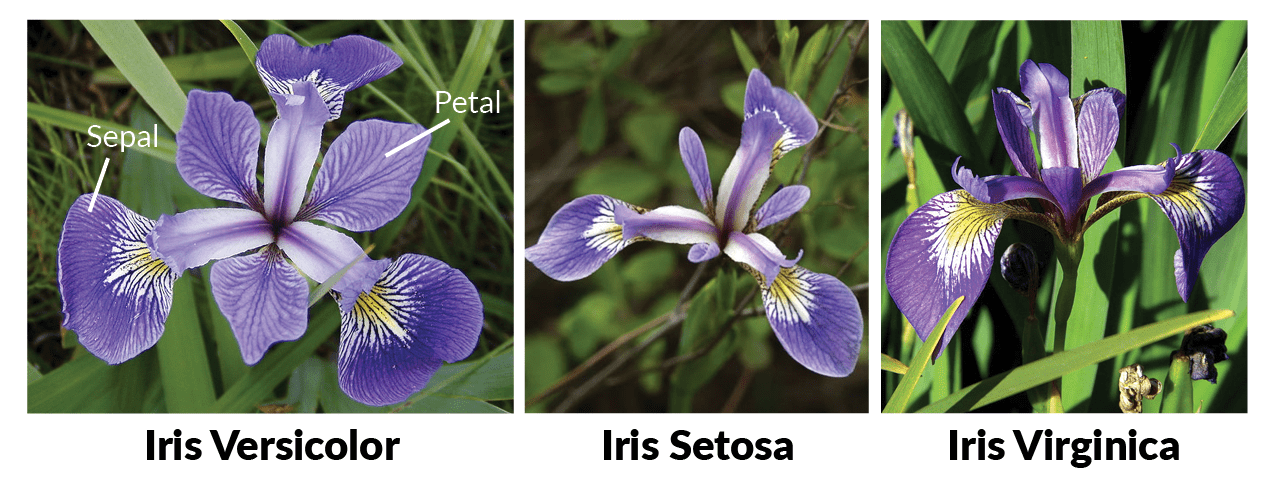

In [2]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png")
img = Image.open(BytesIO(response.content))
img

 - Roland Fisher라는 통계학자가 수집한 데이터
 - 데이터 분석의 기본 데이터 중 하나
 - R(통계 프로그램)에 내장되어 있다.
 - Sepal(꽃받침)과 Petal(꽃잎)의 길이와 폭으로 Species(종)을 분류
 - 세 종류 꽃이 있고 각 50개의 샘플, 총 150개의 샘플로 구성되어 있는 데이터
 - 주로 분류, 군집화를 연습할 때 쓰인다.

# Load data

In [3]:
iris = sns.load_dataset('iris')
# seaborn 내장 데이터셋 (꽃잎, 꽃받침의 너비와 폭에 대한 내용을 정리함 / 해당 내용을 통해 종을 구분하는데 이용)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
type(iris) # 행과 열로 이루어진 데이터구조인 데이터프레임

pandas.core.frame.DataFrame

# Data summary

In [5]:
iris.head() # 가장 앞 5줄

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.tail()# 가장 뒤 5줄

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
iris.info() # 데이터프레임의 개요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


 - 총 150개의 데이터
 - 5개의 columns
 - 4개의 특성과 1개의 종으로 구성

In [8]:
iris.describe() # 데이터프레임의 통계적 개요

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.index # 인덱스

RangeIndex(start=0, stop=150, step=1)

In [10]:
iris.columns # 컬럼

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
iris['species'].unique() # 종 확인

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
iris['species'].value_counts() # 종의 갯수 확인

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

# Exploring Data

## 데이터 보기

In [13]:
iris.sort_values(by='sepal_length', ascending = False).head(10) # seplal_length기준으로 내림차순 정렬

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
105,7.6,3.0,6.6,2.1,virginica
130,7.4,2.8,6.1,1.9,virginica
107,7.3,2.9,6.3,1.8,virginica
125,7.2,3.2,6.0,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


In [14]:
iris['sepal_length'].head(10) # sepal_length의 값을 serise 행태로 가져오기 (위 셀은 데이터프레임 전체를 가져옴)

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
5    5.4
6    4.6
7    5.0
8    4.4
9    4.9
Name: sepal_length, dtype: float64

In [15]:
type(iris['sepal_length'])

pandas.core.series.Series

## Indexing / Slicing

- 행과 열을 선택해서 데이터를 가져오기

### 열

컬럼의 이름을 통해 컬럼을 선택할 수 있다.

In [16]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [17]:
iris['sepal_length'].head() # series 형식으로 가져옴

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [18]:
iris[['sepal_length']].head() # dataframe 형식으로 가져옴

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [19]:
type(iris['sepal_length']), type(iris[['sepal_length']])

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [20]:
iris[['sepal_length', 'petal_length']].head() # 컬럼 2개 선택해 가져오기

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


컬럼의 번호를 통해 컬럼을 선택할 수 있다. (iloc)

In [21]:
iris.iloc[:,[0,2]].head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


### 행 (loc, iloc, ix)

- loc : label을 이용해 가져옴
- iloc : integer position을 이용해 가져옴
- ix : label, integer position 둘 다 이용 가능

In [22]:
s = pd.Series(np.nan, index = [49, 48, 47, 46, 45, 1, 2, 3, 4, 5])
s

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
dtype: float64

In [23]:
s.loc[1:4] # 번호가 아닌 label(이름)을 통해 가져옴

1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

In [24]:
s.loc[:3]

49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
2    NaN
3    NaN
dtype: float64

In [25]:
s.iloc[:3] # integer position을 통해 2(0,1,2)번째까지 가져옴

49   NaN
48   NaN
47   NaN
dtype: float64

In [26]:
s.ix[:3] # 라벨이 숫자인 경우 loc으로 우선 처리한다. (label-based indexing)

/Users/juu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


49   NaN
48   NaN
47   NaN
46   NaN
45   NaN
1    NaN
2    NaN
3    NaN
dtype: float64

In [27]:
s2 = pd.Series(np.nan, index = ['a', 'b', 'c', 'd', 'e', 1,2,3,4,5]) # 인덱스가 숫자와 문자로 되어있는 경우
s2

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
dtype: float64

In [28]:
s2.loc[:3] # 인덱스가 숫자와 문자로 혼합되어 있으면 라벨로는 인덱싱이 안된다.

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [3] of <class 'int'>

In [31]:
s2.iloc[:3]

a   NaN
b   NaN
c   NaN
dtype: float64

In [32]:
s2.ix[:3] # 라벨이 문자와 숫자로 혼합되어 있는 경우 iloc로 우선 처리한다. (integer position based indexing)

/Users/juu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


a   NaN
b   NaN
c   NaN
dtype: float64

### 행과 열 

In [33]:
iris.loc[:10,'sepal_width' : 'species'] # 데이터[행,열]

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa
5,3.9,1.7,0.4,setosa
6,3.4,1.4,0.3,setosa
7,3.4,1.5,0.2,setosa
8,2.9,1.4,0.2,setosa
9,3.1,1.5,0.1,setosa


In [34]:
iris.loc[:10,['sepal_width','species']]

,sepal_width,species
0,3.5,setosa
1,3.0,setosa
2,3.2,setosa
3,3.1,setosa
4,3.6,setosa
5,3.9,setosa
6,3.4,setosa
7,3.4,setosa
8,2.9,setosa
9,3.1,setosa


In [35]:
iris.loc[[1,5],'sepal_width':'species']

,sepal_width,petal_length,petal_width,species
1,3.0,1.4,0.2,setosa
5,3.9,1.7,0.4,setosa


In [36]:
iris.loc[[1,5],['sepal_width','species']]

,sepal_width,species
1,3.0,setosa
5,3.9,setosa


In [37]:
iris.iloc[:3, :4]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [38]:
iris.iloc[[1,3], [0,3]]

,sepal_length,petal_width
1,4.9,0.2
3,4.6,0.2


In [39]:
iris.ix[:3, :4] # 아이리스 데이터는 라벨이 숫자이므로 label-based indexing

/Users/juu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


## 데이터 추가하기

In [40]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
# sepal_length와 sepal_width를 더한 값을 넣어 sepal_sum 컬럼을 만드세요
iris['sepal_sum'] = iris['sepal_length'] + iris['sepal_width']
iris['sepal_sum'].head()

0    8.6
1    7.9
2    7.9
3    7.7
4    8.6
Name: sepal_sum, dtype: float64

In [42]:
# 연습문제 1
# petal_length와 petal_width를 더한 값을 넣어 petal_sum 컬럼을 만드세요

In [43]:
iris['petal_sum'] = iris['petal_length'] + iris['petal_width']
iris['petal_sum'].head()

0    1.6
1    1.6
2    1.5
3    1.7
4    1.6
Name: petal_sum, dtype: float64

In [44]:
# 연습문제 2
# sepal_width을 sepal_legnth로 나누어 sepal_ratio 컬럼을 만드세요

In [45]:
iris['sepal_ratio'] = iris['sepal_width'] / iris['sepal_length']
iris['sepal_ratio'].head()

0    0.686275
1    0.612245
2    0.680851
3    0.673913
4    0.720000
Name: sepal_ratio, dtype: float64

In [46]:
# 연습문제 3
# petal_width을 petal_legnth로 나누어 petal_ratio 컬럼을 만드세요

In [47]:
iris['petal_ratio'] = iris['petal_width'] / iris['petal_length']
iris['petal_ratio'].head()

0    0.142857
1    0.142857
2    0.153846
3    0.133333
4    0.142857
Name: petal_ratio, dtype: float64

## 종류 별로 묶기

In [48]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal_sum', 'petal_sum', 'sepal_ratio', 'petal_ratio'],
      dtype='object')

In [49]:
iris.groupby('species').mean() # 종류별 평균값

,sepal_length,sepal_width,petal_length,petal_width,sepal_sum,petal_sum,sepal_ratio,petal_ratio
species,,,,,,,,
setosa,5.006,3.428,1.462,0.246,8.434,1.708,0.684248,0.167868
versicolor,5.936,2.770,4.260,1.326,8.706,5.586,0.467680,0.311106
virginica,6.588,2.974,5.552,2.026,9.562,7.578,0.453396,0.366739


In [50]:
iris.groupby('species').sum() # 종류별 총 합

,sepal_length,sepal_width,petal_length,petal_width,sepal_sum,petal_sum,sepal_ratio,petal_ratio
species,,,,,,,,
setosa,250.3,171.4,73.1,12.3,421.7,85.4,34.212416,8.393415
versicolor,296.8,138.5,213.0,66.3,435.3,279.3,23.384018,15.555309
virginica,329.4,148.7,277.6,101.3,478.1,378.9,22.669782,18.336929


In [51]:
iris.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... sepal_ratio           petal_ratio  \
                 count   mean  ...         75%       max       count   
species                        ...                                     
setosa            50.0  3.428  ...    0.721667  0.788462        50.0   
versicolor        50.0  2.770  ...    0.491659  0.566667        50.0   
virginica         50.0  2.974  ...    0.492182  0.548387        50.0   

                                                                        \
                mean       std       min       25%       50%       75%   
species                                                                  
setosa      0.167868  0.065789  0.066667  0.133333  0.142857  0.213346   
versicolor  0.311106  0.029213  0.243902  0.292614  0.308608  0.331522   
virginica   0.366739  0.050232  0.250000  0.327273  0.375000  0.398214   

                      
                 max  
species               
setosa      0.375000  
versicolor  0.375000  
virginica   0.470588  

[3 rows x 64 columns]

## 데이터 병합하기 

pandas는 두 개 이상의 데이터프레임을 하나로 합치는데 merging(병합), concatenating(연결)을 지원한다.
- merge : 공통된 열 또는 행을 기준으로 병합
- concat : 공통된 열 또는 행을 갖고 있는 경우 연속적으로 붙임

In [52]:
df1 = pd.DataFrame({'Number' : [1001, 1002, 1003, 1004, 1005, 1006, 1007],
                   'Name' : ['a', 'b', 'c', 'd', 'e', 'f', 'g']},
                   columns = ['Number', 'Name'])

df2 = pd.DataFrame({'Number' : [1001, 1001, 1005, 1006, 1008, 1001],
                   'Price' : [10000, 20000, 15000, 5000, 10000, 30000]},
                   columns = ['Number', 'Price'])

In [53]:
df1

,Number,Name
0,1001,a
1,1002,b
2,1003,c
3,1004,d
4,1005,e
5,1006,f
6,1007,g


In [54]:
df2

,Number,Price
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,10000
5,1001,30000


### merge

두 데이터프레임의 **공통된** 열 혹은 인덱스(행)를 기준으로 테이블을 합친다. <br>
이때 기준이 되는 열이나 행을 'key'라고 한다.

In [55]:
pd.merge(df1, df2)

,Number,Name,Price
0,1001,a,10000
1,1001,a,20000
2,1001,a,30000
3,1005,e,15000
4,1006,f,5000


- 공통된 열 기준으로 합쳐진다.
- 따라서 df1에 없는 1008은 제외된다.

In [56]:
pd.merge(df1, df2, how = 'outer')

,Number,Name,Price
0,1001,a,10000.0
1,1001,a,20000.0
2,1001,a,30000.0
3,1002,b,NaN
4,1003,c,NaN
5,1004,d,NaN
6,1005,e,15000.0
7,1006,f,5000.0
8,1007,g,NaN
9,1008,NaN,10000.0


- 옵션으로 'outer'를 넣을 수 있다.
- outer join은 공통된 'key'가 한쪽에만 있어도 데이터를 보여준다.
    - 값이 없는 부분은 NaN으로 표시
- merge는 how = 'inner'가 default

In [57]:
pd.merge(df1, df2, how = 'left') # 왼쪽(df1)을 기준으로 병합

,Number,Name,Price
0,1001,a,10000.0
1,1001,a,20000.0
2,1001,a,30000.0
3,1002,b,NaN
4,1003,c,NaN
5,1004,d,NaN
6,1005,e,15000.0
7,1006,f,5000.0
8,1007,g,NaN


In [58]:
pd.merge(df1, df2, how = 'right') # 오른쪽(df2)을 기준으로 병합

,Number,Name,Price
0,1001,a,10000
1,1001,a,20000
2,1001,a,30000
3,1005,e,15000
4,1006,f,5000
5,1008,NaN,10000


In [59]:
pd.merge(df2, df1, how = 'left') # 위 셀과 같다.

,Number,Price,Name
0,1001,10000,a
1,1001,20000,a
2,1005,15000,e
3,1006,5000,f
4,1008,10000,NaN
5,1001,30000,a


In [60]:
pd.merge(df1, df2, on = 'Number') # on 옵션을 통해 key를 지정할 수 있다.

,Number,Name,Price
0,1001,a,10000
1,1001,a,20000
2,1001,a,30000
3,1005,e,15000
4,1006,f,5000


### concat

기준 열을 지정하지 않고 단순히 데이터를 연결한다. <br>
단순 연결이기 때문에 인덱스 값이 중복될 수 있다.

In [61]:
pd.concat([df1, df2]) 
# 아래에 붙는다. 축이 0 방향 / axis = 0이 default / 공통 부분이 없는 것은 NaN 처리

/Users/juu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Name,Number,Price
0,a,1001,NaN
1,b,1002,NaN
2,c,1003,NaN
3,d,1004,NaN
4,e,1005,NaN
5,f,1006,NaN
6,g,1007,NaN
0,NaN,1001,10000.0
1,NaN,1001,20000.0
2,NaN,1005,15000.0


In [62]:
pd.concat([df1, df2], axis = 1) # 옆으로 붙는다. 축이 1 방향

,Number,Name,Number,Price
0,1001,a,1001.0,10000.0
1,1002,b,1001.0,20000.0
2,1003,c,1005.0,15000.0
3,1004,d,1006.0,5000.0
4,1005,e,1008.0,10000.0
5,1006,f,1001.0,30000.0
6,1007,g,NaN,NaN


# Visulalization

In [64]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_sum,petal_sum,sepal_ratio,petal_ratio
0,5.1,3.5,1.4,0.2,setosa,8.6,1.6,0.686275,0.142857
1,4.9,3.0,1.4,0.2,setosa,7.9,1.6,0.612245,0.142857
2,4.7,3.2,1.3,0.2,setosa,7.9,1.5,0.680851,0.153846
3,4.6,3.1,1.5,0.2,setosa,7.7,1.7,0.673913,0.133333
4,5.0,3.6,1.4,0.2,setosa,8.6,1.6,0.720000,0.142857


In [65]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [66]:
setosa = iris[iris['species'] == 'setosa']
versicolor = iris[iris['species'] == 'versicolor']
virginica = iris[iris['species'] == 'virginica']

In [67]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepal_sum,petal_sum,sepal_ratio,petal_ratio
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000,8.434000,1.708000,0.684248,0.167868
std,0.35249,0.379064,0.173664,0.105386,0.682914,0.231093,0.051871,0.065789
min,4.30000,2.300000,1.000000,0.100000,6.800000,1.200000,0.511111,0.066667
25%,4.80000,3.200000,1.400000,0.200000,7.925000,1.600000,0.648756,0.133333
50%,5.00000,3.400000,1.500000,0.200000,8.450000,1.700000,0.683502,0.142857
75%,5.20000,3.675000,1.575000,0.300000,8.875000,1.800000,0.721667,0.213346
max,5.80000,4.400000,1.900000,0.600000,10.100000,2.300000,0.788462,0.375000


In [68]:
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepal_sum,petal_sum,sepal_ratio,petal_ratio
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000,8.706000,5.586000,0.467680,0.311106
std,0.516171,0.313798,0.469911,0.197753,0.731621,0.637281,0.046829,0.029213
min,4.900000,2.000000,3.000000,1.000000,7.000000,4.100000,0.354839,0.243902
25%,5.600000,2.525000,4.000000,1.200000,8.300000,5.225000,0.447890,0.292614
50%,5.900000,2.800000,4.350000,1.300000,8.600000,5.650000,0.462687,0.308608
75%,6.300000,3.000000,4.600000,1.500000,9.250000,6.000000,0.491659,0.331522
max,7.000000,3.400000,5.100000,1.800000,10.200000,6.700000,0.566667,0.375000


In [69]:
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepal_sum,petal_sum,sepal_ratio,petal_ratio
count,50.00000,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,50.000000
mean,6.58800,2.974000,5.552000,2.02600,9.56200,7.578000,0.453396,0.366739
std,0.63588,0.322497,0.551895,0.27465,0.83419,0.691136,0.047015,0.050232
min,4.90000,2.200000,4.500000,1.40000,7.40000,6.200000,0.337662,0.250000
25%,6.22500,2.800000,5.100000,1.80000,9.02500,7.000000,0.426815,0.327273
50%,6.50000,3.000000,5.550000,2.00000,9.60000,7.550000,0.460928,0.375000
75%,6.90000,3.175000,5.875000,2.30000,10.07500,8.000000,0.492182,0.398214
max,7.90000,3.800000,6.900000,2.50000,11.70000,9.200000,0.548387,0.470588


x축은 length, y축은 width로 지정하여 species 별로 scatter plot을 그려보자

<Figure size 432x288 with 0 Axes>

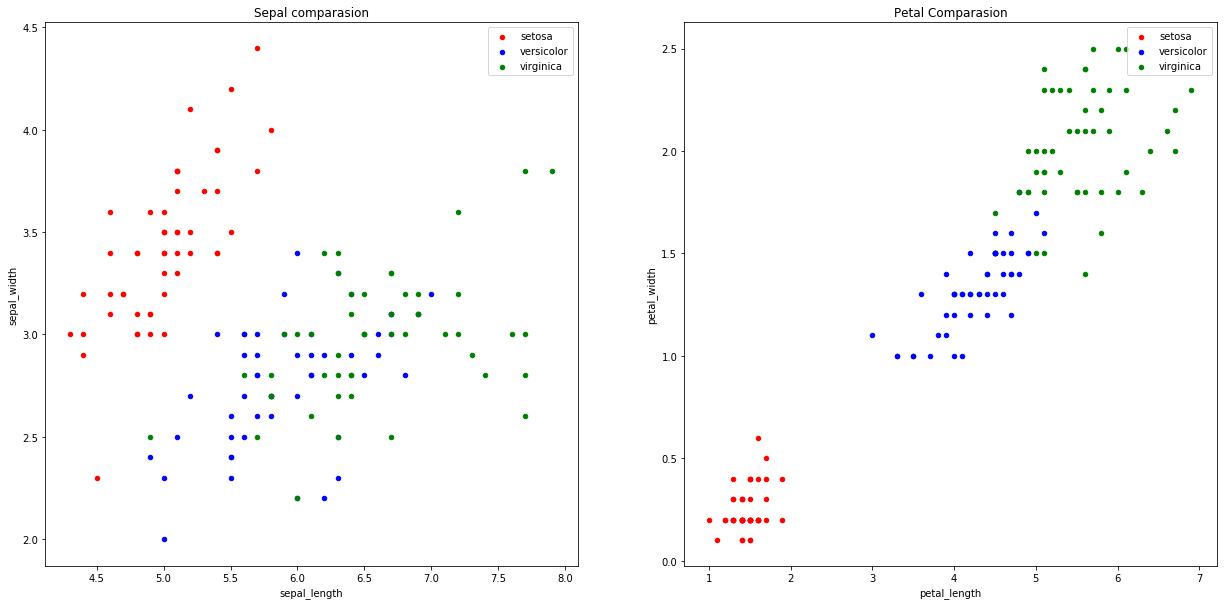

In [70]:
plt.figure() # figure 그리기

fig,ax=plt.subplots(1,2,figsize=(21, 10))

setosa.plot(x="sepal_length", # x축 지정
            y="sepal_width", # y축 지정
            kind="scatter", # 플랏 종류 지정
            ax=ax[0], # figure 위치 지정
            label='setosa', # 범례 이름 지정
            color='r')

versicolor.plot(x="sepal_length", y="sepal_width",
                kind="scatter", ax=ax[0], label='versicolor', color='b')

virginica.plot(x="sepal_length", y="sepal_width", 
               kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="petal_length", y="petal_width", 
            kind="scatter",ax=ax[1],label='setosa',color='r')

versicolor.plot(x="petal_length",y="petal_width",
                kind="scatter",ax=ax[1],label='versicolor',color='b')

virginica.plot(x="petal_length", y="petal_width", 
               kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparasion') # figure의 전체 Title 지정
ax[1].set(title='Petal Comparasion')

ax[0].legend()
ax[1].legend()

plt.show()

길이와 넓이를 기준으로 꽃의 종류가 어느정도 나눠지는 것을 확인할 수 있다.

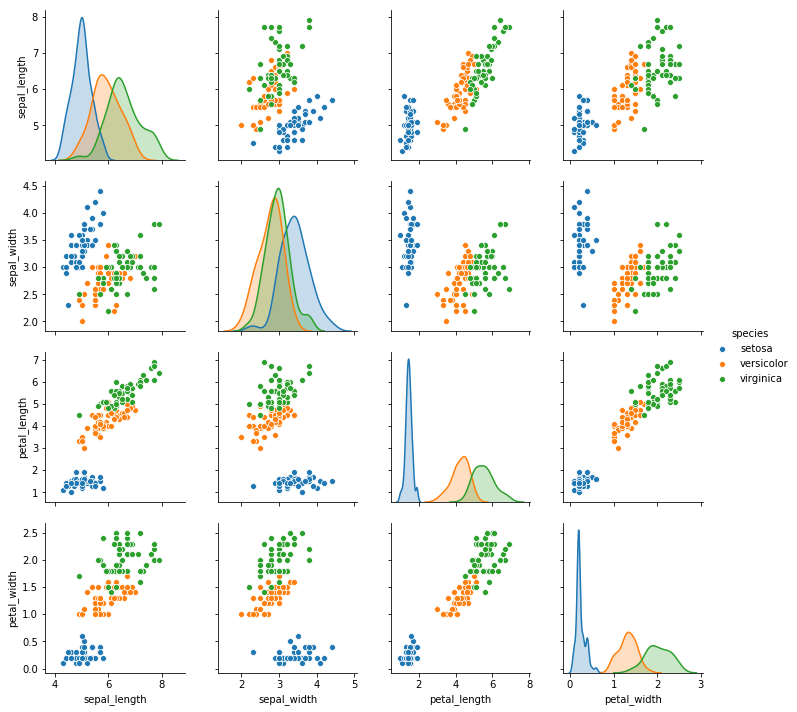

In [72]:
iris = sns.load_dataset('iris')

sns.pairplot(iris, hue = 'species')
# seaborn은 matplot보다 좀 더 간단한 시각화 도구 / 좀 더 예쁘게 표현
plt.show()